# **WALMART**

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import plotly.express as px
from statsmodels.formula import api
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.formula import api
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
sns.set_style("dark")
px.defaults.template = 'plotly_dark'
import warnings
warnings.filterwarnings('ignore')

## **1. Data Exploration**

In [81]:
url='https://raw.githubusercontent.com/Saul-Ochoa/Python-MachineLearning/main/Machine%20learning%20projects/Data/Walmart.csv'
df=pd.read_csv(url,sep=',')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [82]:
print(df.info())
print("El tamaño de la tabla : ",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
El tamaño de la tabla :  (6435, 8)


In [83]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [84]:
df['WeeklDay']=df['Date'].dt.weekday
df['Month']=df['Date'].dt.month
df['year']=df['Date'].dt.year
df.drop(['Date'],axis=1,inplace=True)
target='Weekly_Sales'
features=[i for i in df.columns if i not in [target]]
print(features)
original_df=df.copy(deep=True)
df.head()

['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'WeeklDay', 'Month', 'year']


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,WeeklDay,Month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   WeeklDay      6435 non-null   int32  
 8   Month         6435 non-null   int32  
 9   year          6435 non-null   int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 427.5 KB


In [86]:
df.nunique().sort_values()

WeeklDay           1
Holiday_Flag       2
year               3
Month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [87]:
df_types=df[features].nunique().sort_values()
num=[]; cat=[]; num_1=0;cat_1=0
for i in range(df[features].shape[1]):
    if df_types.values[i]<=45: cat.append(df_types.index[i])
    else: num.append(df_types.index[i])
print(f"Dataset has {len(num)} numerical and {len(cat)} categorical features")

Dataset has 4 numerical and 5 categorical features


In [88]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,WeeklDay,Month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,4.0,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.0,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,4.0,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.0,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.0,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.0,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,4.0,12.000000,2012.000000


## **2. Exploratory Data Analysis (EDA)**

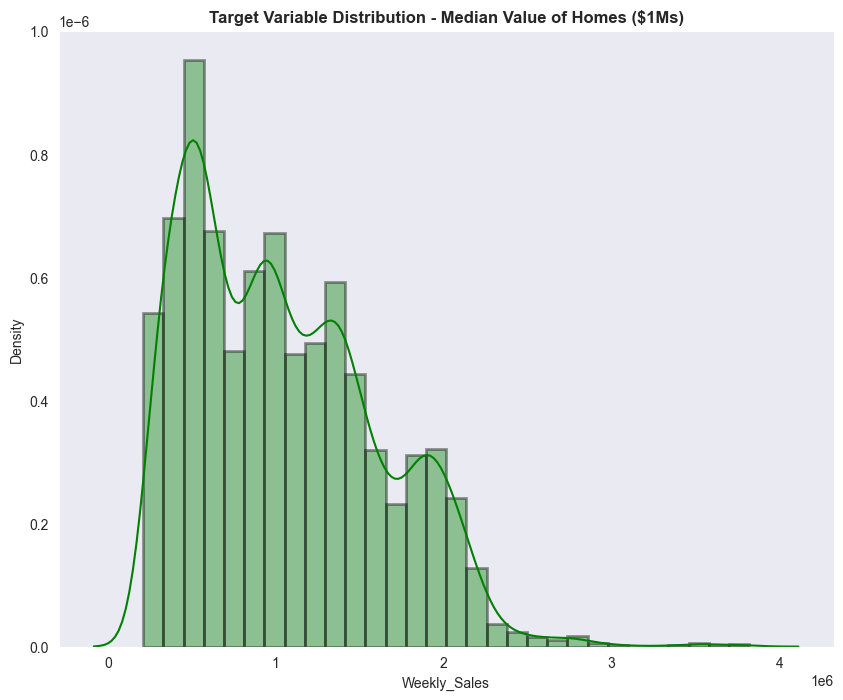

In [89]:
plt.figure(figsize=(10,8))
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)',weight='bold')
plt.show()

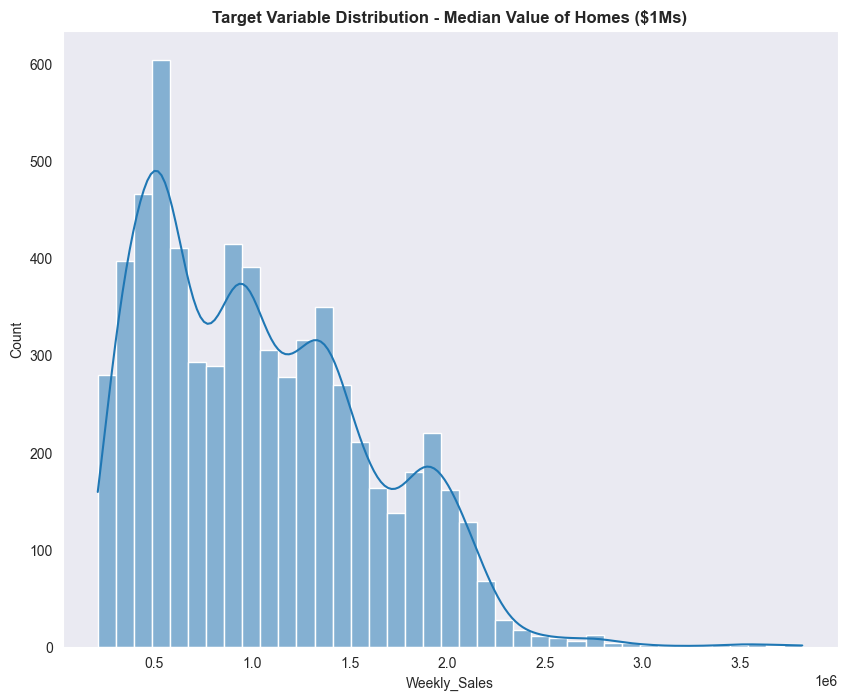

In [90]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x=target,kde=True)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)',weight='bold')
plt.show()

In [91]:
fig = px.histogram(df, x=target, nbins=30, title='Target Variable Distribution - Median Value of Homes ($1Ms)')
fig.update_traces(marker_color='green', marker_line=dict(color='black', width=2))
fig.show()

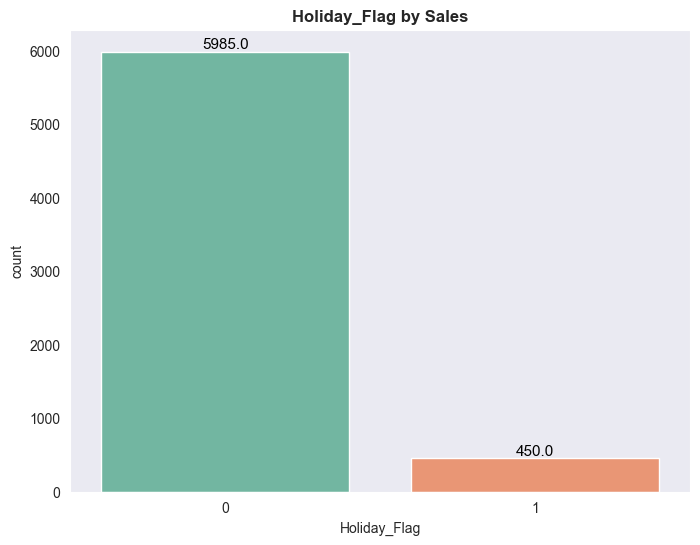

In [92]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='Holiday_Flag',palette='Set2')

# Añadir etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Holiday_Flag by Sales', weight='bold')
plt.show()

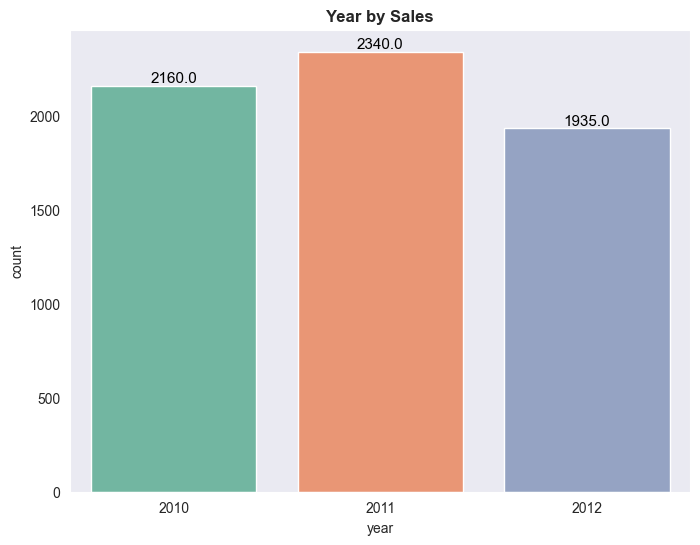

In [93]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='year',palette='Set2')

# Añadir etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Year by Sales', weight='bold')
plt.show()

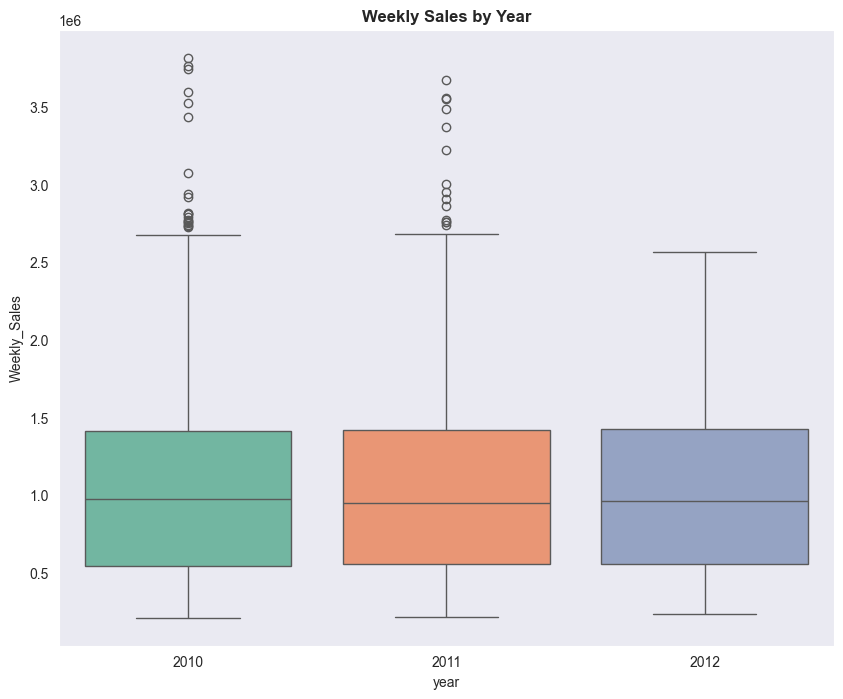

In [94]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='year',y='Weekly_Sales',palette='Set2')
plt.title('Weekly Sales by Year',weight='bold')
plt.show()

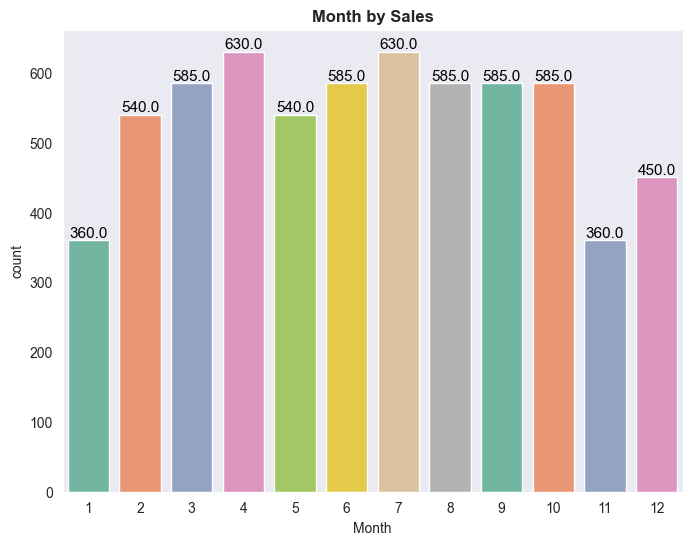

In [95]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='Month',palette='Set2')

# Añadir etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Month by Sales', weight='bold')
plt.show()

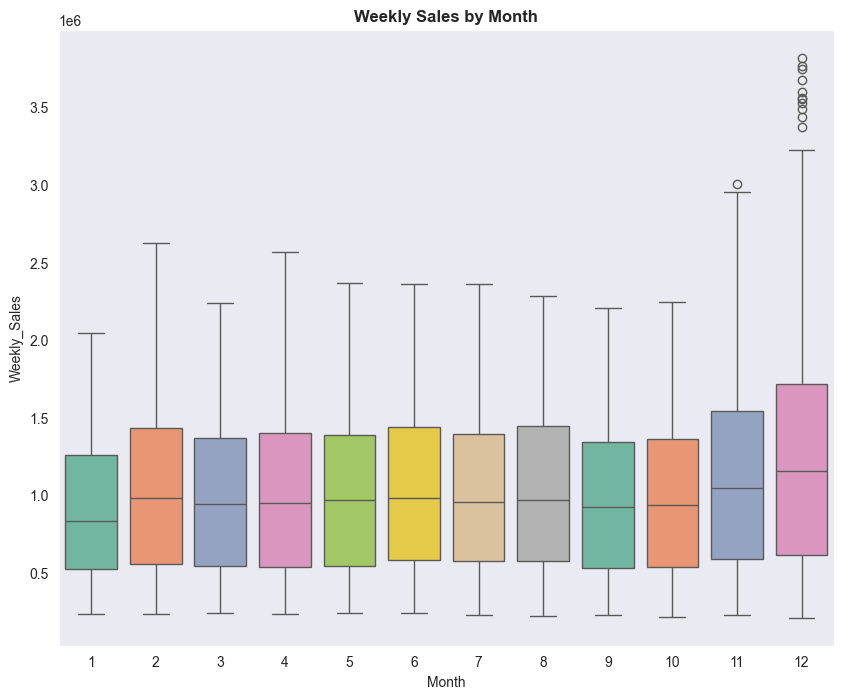

In [96]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='Month',y='Weekly_Sales',palette='Set2')
plt.title('Weekly Sales by Month',weight='bold')
plt.show()

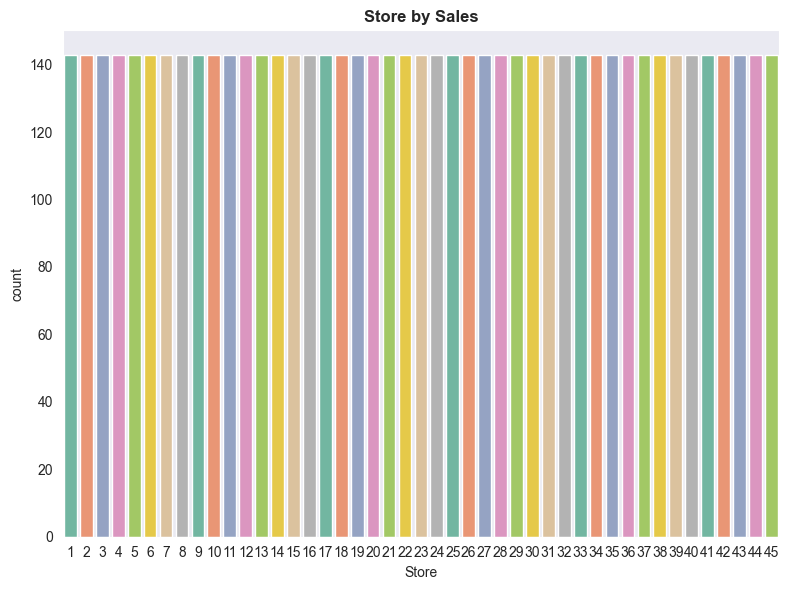

In [97]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Store',palette='Set2')
plt.title('Store by Sales', weight='bold')
plt.tight_layout()
plt.show()

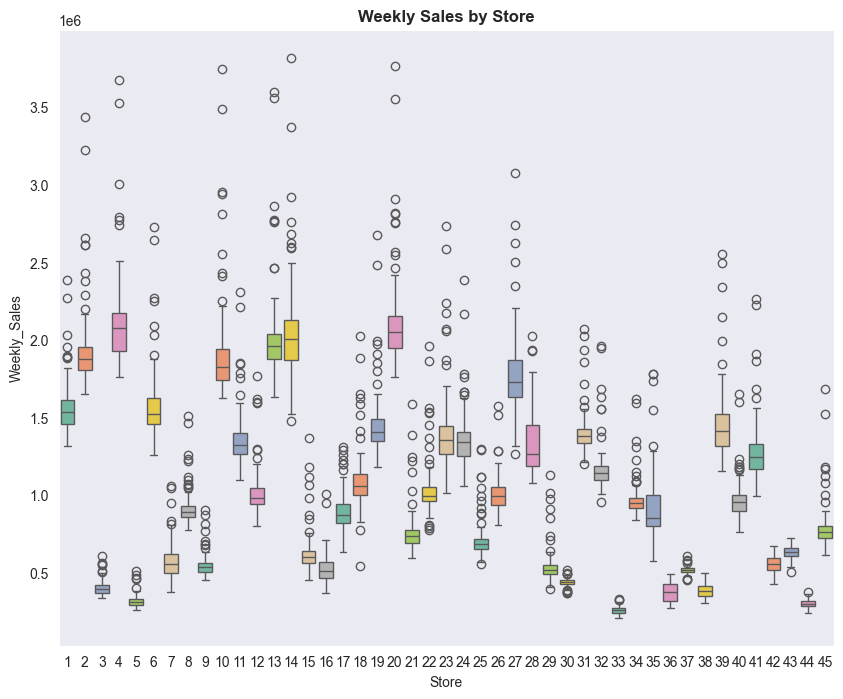

In [98]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='Store',y='Weekly_Sales',palette='Set2')
plt.title('Weekly Sales by Store',weight='bold')
plt.show()

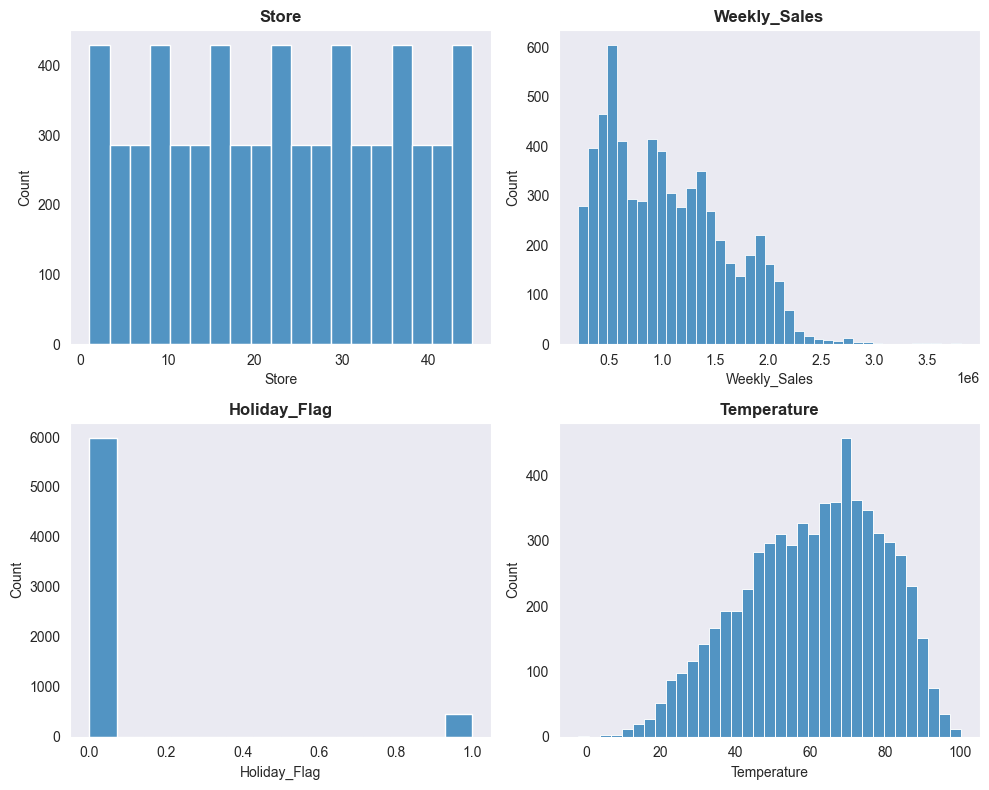

In [99]:
# Obtener las columnas del DataFrame (excluyendo la columna del índice si la hay)
num = df.columns.tolist()
# Crear una matriz de subgráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
# Iterar sobre la matriz de subgráficos y las columnas del DataFrame
for i, ax in zip(num, axes.flat):
    sns.histplot(data=df, x=i, ax=ax)
    ax.set_title(i, weight='bold')
# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

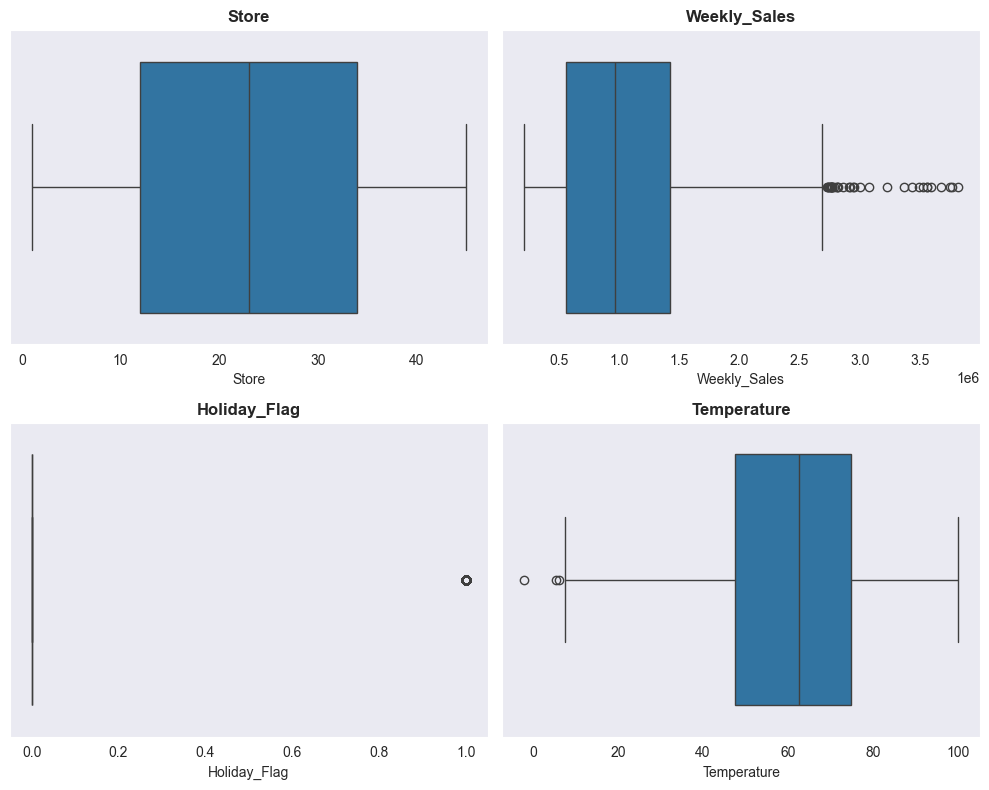

In [100]:
# Obtener las columnas del DataFrame (excluyendo la columna del índice si la hay)
num = df.columns.tolist()
# Crear una matriz de subgráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
# Iterar sobre la matriz de subgráficos y las columnas del DataFrame
for i, ax in zip(num, axes.flat):
    sns.boxplot(data=df, x=i, ax=ax,orient='h')
    ax.set_title(i, weight='bold')
# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

## **3. Data Pre-processing**

In [101]:
df.drop_duplicates(inplace=True)
if df.shape[0]==original_df.shape[0]:
    print('Dont have any duplicates')
else:
    print('have any duplicates')

Dont have any duplicates


In [102]:
# check columns of total null values
df_nulls=pd.DataFrame(df.isnull().sum().sort_values(),columns=['Total Null values'])
df_nulls['Percentaje']=round(df_nulls['Total Null values']/df.shape[0],3)*100
df_nulls.head()

,Total Null values,Percentaje
Store,0,0.0
Weekly_Sales,0,0.0
Holiday_Flag,0,0.0
Temperature,0,0.0
Fuel_Price,0,0.0


In [103]:
df[cat].nunique()

WeeklDay         1
Holiday_Flag     2
year             3
Month           12
Store           45
dtype: int64

In [104]:
# Data categoricos
df[cat].nunique()
# One hot binary encoding
for i in cat:
    if df[cat].nunique()[i]==2:
        print(f'{i}, One hot binary encoding')
    elif df[cat].nunique()[i]==1:
        print('Ninguna')
    else:
        print(f'{i}, Dummy Encoding on features')    

Ninguna
Holiday_Flag, One hot binary encoding
year, Dummy Encoding on features
Month, Dummy Encoding on features
Store, Dummy Encoding on features


In [105]:
num

['Store',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'WeeklDay',
 'Month',
 'year']

In [106]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,WeeklDay,Month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


In [107]:
encoder=OneHotEncoder()
df_one_hot_1=encoder.fit_transform(df[['Holiday_Flag','year','WeeklDay','Month','Store']])
# Creamos un nuevo DataFrame con los datos codificados
df_one_hot = pd.DataFrame(df_one_hot_1.toarray(), columns=encoder.get_feature_names_out(['Holiday_Flag','year','WeeklDay','Month','Store']))
df_one_hot.head()

,Holiday_Flag_0,Holiday_Flag_1,year_2010,year_2011,year_2012,WeeklDay_4,Month_1,Month_2,Month_3,Month_4,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
print(df_one_hot.shape)
print(df.shape)

(6435, 63)
(6435, 10)


In [109]:
col_1=['Holiday_Flag','WeeklDay', 'Month', 'year']
df_1=df.copy()
df_1=df.drop(columns=col_1)
df_1.head()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,42.31,2.572,211.096358,8.106
1,1,1641957.44,38.51,2.548,211.242170,8.106
2,1,1611968.17,39.93,2.514,211.289143,8.106
3,1,1409727.59,46.63,2.561,211.319643,8.106
4,1,1554806.68,46.50,2.625,211.350143,8.106


In [110]:
#df_one_hot=pd.get_dummies(df['Holiday_Flag'],prefix='Holiday_Flag')
#df_dummy=pd.get_dummies(df[['year','WeeklDay','Month','Store']],drop_first=True)
# Concatenar los DataFrames resultantes
#df_encoded = pd.concat([df_one_hot, df_dummy], axis=1)
#df_encoded.head()

In [111]:
df_new = pd.concat([df_1, df_one_hot], axis=1)
df_new.head()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag_0,Holiday_Flag_1,year_2010,year_2011,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1,1643690.90,42.31,2.572,211.096358,8.106,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1641957.44,38.51,2.548,211.242170,8.106,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1611968.17,39.93,2.514,211.289143,8.106,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1409727.59,46.63,2.561,211.319643,8.106,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1554806.68,46.50,2.625,211.350143,8.106,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
print(df_new.shape)
print(df.shape)
print(df_1.shape)

(6435, 69)
(6435, 10)
(6435, 6)


**Remove OF Outlier**

In [116]:
num_new=[
 'Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment'
 ]

In [117]:
# Removal of outlier
df_outlier=df_new.copy()
for i in num_new:
    q1=df_outlier[i].quantile(0.25)
    q3=df_outlier[i].quantile(0.75)
    IQR=q3-q1
    df_outlier=df_outlier[df_outlier[i]<=(q3+(1.5*IQR))]
    df_outlier=df_outlier[df_outlier[i]>=(q3-(1.5*IQR))]
    df_outlier=df_outlier.reset_index(drop=True)
display(df_outlier.head())

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag_0,Holiday_Flag_1,year_2010,year_2011,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1,1643690.90,42.31,2.572,211.096358,8.106,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1641957.44,38.51,2.548,211.242170,8.106,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1409727.59,46.63,2.561,211.319643,8.106,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1554806.68,46.50,2.625,211.350143,8.106,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1439541.59,57.79,2.667,211.380643,8.106,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
print(df_new.shape)
print(df_outlier.shape)

(6435, 69)
(4855, 69)


## **4. Data Manipulation**

In [122]:
X = df_outlier.drop([target],axis=1)
y = df_outlier[target]
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)
X_train.reset_index(drop=True,inplace=True)
print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',X_train.shape,y_train.shape,'\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set  --->  (4855, 68) (4855,) 
Training set  --->  (3884, 68) (3884,) 
Testing set   --->  (971, 68)  (971,)


**Standar Scaler**

In [124]:
std=StandardScaler()
print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(X_train)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())


print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(X_test)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,Store,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag_0,Holiday_Flag_1,year_2010,year_2011,year_2012,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
count,3.884000e+03,3.884000e+03,3.884000e+03,3.884000e+03,3.884000e+03,3.884000e+03,3.884000e+03,3.884000e+03,3.884000e+03,3.884000e+03,...,3.884000e+03,3.884000e+03,3.884000e+03,3.884000e+03,3884.0,3.884000e+03,3.884000e+03,3.884000e+03,3.884000e+03,3.884000e+03
mean,1.829410e-17,3.288364e-16,2.643497e-16,1.737939e-17,-3.471305e-16,-2.058086e-16,2.012351e-17,-8.140873e-17,-4.482054e-17,-1.308028e-16,...,-4.070437e-17,1.875145e-17,6.037052e-17,-7.317639e-18,0.0,4.207642e-17,-4.390583e-17,-1.097646e-17,2.195292e-17,7.660653e-18
std,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,...,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,0.0,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00,1.000129e+00
min,-1.689280e+00,-1.976888e+00,-1.741171e+00,-1.332957e+00,-1.848506e+00,-4.090863e+00,-2.444472e-01,-7.444607e-01,-7.561966e-01,-6.230043e-01,...,-1.754582e-01,-1.675028e-01,-5.795089e-02,-1.746771e-01,0.0,-1.486784e-01,-1.762362e-01,-1.785525e-01,-1.273651e-01,-1.675028e-01
25%,-9.273641e-01,-8.195205e-01,-1.037359e+00,-1.103191e+00,-7.420180e-01,2.444472e-01,-2.444472e-01,-7.444607e-01,-7.561966e-01,-6.230043e-01,...,-1.754582e-01,-1.675028e-01,-5.795089e-02,-1.746771e-01,0.0,-1.486784e-01,-1.762362e-01,-1.785525e-01,-1.273651e-01,-1.675028e-01
50%,6.312683e-02,6.214248e-02,2.564750e-01,3.820899e-01,8.225234e-03,2.444472e-01,-2.444472e-01,-7.444607e-01,-7.561966e-01,-6.230043e-01,...,-1.754582e-01,-1.675028e-01,-5.795089e-02,-1.746771e-01,0.0,-1.486784e-01,-1.762362e-01,-1.785525e-01,-1.273651e-01,-1.675028e-01
75%,8.250429e-01,7.781856e-01,8.359608e-01,9.481891e-01,5.667934e-01,2.444472e-01,-2.444472e-01,1.343254e+00,1.322407e+00,1.605125e+00,...,-1.754582e-01,-1.675028e-01,-5.795089e-02,-1.746771e-01,0.0,-1.486784e-01,-1.762362e-01,-1.785525e-01,-1.273651e-01,-1.675028e-01
max,1.663151e+00,2.366033e+00,2.363696e+00,1.266671e+00,2.867862e+00,2.444472e-01,4.090863e+00,1.343254e+00,1.322407e+00,1.605125e+00,...,5.699365e+00,5.970051e+00,1.725599e+01,5.724850e+00,0.0,6.725927e+00,5.674203e+00,5.600595e+00,7.851443e+00,5.970051e+00



                                          Standardardization on Testing set                                          


,Store,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag_0,Holiday_Flag_1,year_2010,year_2011,year_2012,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
count,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,...,971.000000,971.000000,971.000000,971.000000,971.0,971.000000,971.000000,971.000000,971.000000,971.000000
mean,0.004590,0.053589,0.029978,0.035173,-0.030877,-0.005581,0.005581,-0.052139,0.031575,0.021799,...,-0.024201,0.060048,0.013373,-0.010633,0.0,0.028320,-0.019582,-0.053566,0.036977,-0.015802
std,0.996373,1.013573,0.990717,1.003424,1.061040,1.011182,1.011182,0.983391,1.008925,1.010934,...,0.930925,1.160264,1.109542,0.970487,0.0,1.089351,0.944921,0.841085,1.133830,0.953412
min,-1.689280,-1.973602,-1.688490,-1.332957,-1.848506,-4.090863,-0.244447,-0.744461,-0.756197,-0.623004,...,-0.175458,-0.167503,-0.057951,-0.174677,0.0,-0.148678,-0.176236,-0.178552,-0.127365,-0.167503
25%,-0.927364,-0.722580,-0.946748,-1.139147,-0.877546,0.244447,-0.244447,-0.744461,-0.756197,-0.623004,...,-0.175458,-0.167503,-0.057951,-0.174677,0.0,-0.148678,-0.176236,-0.178552,-0.127365,-0.167503
50%,0.063127,0.117678,0.300727,0.431614,-0.086644,0.244447,-0.244447,-0.744461,-0.756197,-0.623004,...,-0.175458,-0.167503,-0.057951,-0.174677,0.0,-0.148678,-0.176236,-0.178552,-0.127365,-0.167503
75%,0.825043,0.876112,0.791709,0.958757,0.566793,0.244447,-0.244447,1.343254,1.322407,1.605125,...,-0.175458,-0.167503,-0.057951,-0.174677,0.0,-0.148678,-0.176236,-0.178552,-0.127365,-0.167503
max,1.663151,2.370634,2.363696,1.261419,2.867862,0.244447,4.090863,1.343254,1.322407,1.605125,...,5.699365,5.970051,17.255991,5.724850,0.0,6.725927,5.674203,5.600595,7.851443,5.970051


In [126]:
#Testing a Linear Regression model with statsmodels
Train_xy = pd.concat([Train_X_std,y_train.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in X_train.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1532.
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:50:36   Log-Likelihood:                -50601.
No. Observations:                3884   AIC:                         1.013e+05
Df Residuals:                    3823   BIC:                         1.017e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.038e+06   1780.640    583.030      0.000    1.03e+06    1.04e+06
Store          -7.051e+04   5792.188    -12.173      0.000   -8.19e+04   -5.92e+04
Temperature     2.296e+04   5623.199      4.084      0.000    1.19e+04     3.4e+04
Fuel_Price     -2.157e+04   6370.655     -3.386      0.001   -3.41e+04   -9079.767
CPI             2.028e+05   6.37e+04      3.185      0.001     7.8e+04    3.28e+05
Unemployment   -3.031e+04   5398.816     -5.615      0.000   -4.09e+04   -1.97e+04
Holiday_Flag_0 -8495.5228    978.997     -8.678      0.000   -1.04e+04   -6576.117
Holiday_Flag_1  8495.5228    978.997      8.678      0.000    6576.117    1.04e+04
year_2010       2571.9616   5282.594      0.487      0.626   -7785.011    1.29e+04
year_2011       6369.1258   1946.039      3.273      0.001    2553.751    1.02e+04
year_2012      -9572.2381   4534.635     -2.111      0.035   -1.85e+04    -681.702
WeeklDay_4      -3.29e-10   1.07e-10     -3.070      0.002   -5.39e-10   -1.19e-10
Month_1        -1.178e+04   2675.761     -4.402      0.000    -1.7e+04   -6531.668
Month_2         9670.1902   2611.372      3.703      0.000    4550.373    1.48e+04
Month_3         2021.3880   2131.998      0.948      0.343   -2158.575    6201.351
Month_4         4565.8234   1826.591      2.500      0.012     984.637    8147.010
Month_5         1649.6817   1811.359      0.911      0.362   -1901.641    5201.005
Month_6         3806.1758   2095.100      1.817      0.069    -301.445    7913.796
Month_7        -9900.5643   2501.579     -3.958      0.000   -1.48e+04   -4996.008
Month_8        -4945.8485   2388.150     -2.071      0.038   -9628.018    -263.679
Month_9        -2.458e+04   1977.977    -12.427      0.000   -2.85e+04   -2.07e+04
Month_10       -1.401e+04   1699.131     -8.247      0.000   -1.73e+04   -1.07e+04
Month_11        1.895e+04   2034.856      9.314      0.000     1.5e+04    2.29e+04
Month_12         3.58e+04   2459.373     14.558      0.000     3.1e+04    4.06e+04
Store_1         2.837e+04   9315.851      3.046      0.002    1.01e+04    4.66e+04
Store_2         8.694e+04   9110.201      9.543      0.000    6.91e+04    1.05e+05
Store_3        -1.637e+05   9817.591    -16.672      0.000   -1.83e+05   -1.44e+05
Store_4         1.156e+05      1e+04     11.531      0.000    9.59e+04    1.35e+05
Store_5        -1.524e+05   7778.632    -19.598      0.000   -1.68e+05   -1.37e+05
Store_6         2.434e+04   8962.622      2.716      0.007    6769.731    4.19e+04
Store_7        -8.152e+04   3439.187    -23.703      0.000   -8.83e+04   -7.48e+04
Store_8        -6.734e+04   8316.583     -8.097      0.000   -8.36e+04    -5.1e+04
Store_9          -1.2e+05   8688.151    -13.807      0.000   -1.37e+05   -1.03e+05
Store_10        1.666e+05   1.45e+04     11.460      0.000    1.38e+05    1.95e+05
Store_11    

**El método Manual VIF (Factor de Inflación de la Varianza)**

El método Manual VIF (Factor de Inflación de la Varianza) es una técnica utilizada en estadísticas y análisis de regresión para detectar la multicolinealidad entre variables predictoras. La multicolinealidad ocurre cuando dos o más variables predictoras en un modelo de regresión están altamente correlacionadas entre sí.

El VIF se calcula para cada variable predictora en relación con las otras variables predictoras en el modelo. Un VIF alto indica que la variable predictora está altamente correlacionada con otras variables predictoras, lo que puede dificultar la interpretación del efecto de cada variable en el modelo de regresión.

El VIF se calcula mediante la regresión de una variable predictora contra todas las demás variables predictoras en el modelo. La fórmula para calcular el VIF de una variable predictora $\ X_i$ es:


VIF(X_i) = $\frac{1}{1 - R^2_{X_i}}$

Donde $\ R^2_{X_i}$ es el coeficiente de determinación de la regresión de $\ X_i$ contra todas las demás variables predictoras.

Los pasos básicos para calcular el VIF manualmente son:

1. Seleccionar una variable predictora.
2. Regresar esa variable contra todas las demás variables predictoras.
3. Calcular el coeficiente de determinación $\ R^2 $ de la regresión.
4. Calcular el VIF utilizando la fórmula mencionada anteriormente.
5. Repetir los pasos 1-4 para cada variable predictora.

El VIF se utiliza comúnmente como una herramienta de diagnóstico para identificar variables que pueden causar problemas debido a la multicolinealidad en un modelo de regresión. Si el VIF de una variable es alto (generalmente mayor que 5 o 10, dependiendo del contexto), puede ser necesario considerar acciones como la eliminación de esa variable del modelo o la combinación de variables altamente correlacionadas. Esto puede ayudar a mejorar la estabilidad y la interpretación del modelo de regresión.

Dropped Features -->  ['Store', 'Store_12', 'Month_10', 'Holiday_Flag_0', 'year_2010', 'CPI', 'Store_1', 'year_2012', 'Temperature', 'Unemployment', 'Store_43', 'Month_9', 'Fuel_Price', 'Store_42', 'Month_7', 'Store_39', 'Store_36', 'Month_4', 'Store_21', 'Month_3', 'Store_10', 'Holiday_Flag_1', 'Store_33', 'Store_19', 'Month_6', 'Store_2', 'Store_27', 'Store_45', 'Month_12', 'Store_11', 'Store_34', 'Store_32', 'Store_30', 'Month_2', 'Store_31', 'Store_6', 'Month_5', 'Store_3', 'year_2011', 'Month_1', 'Store_18', 'Store_20', 'Store_22', 'Store_37', 'Month_8', 'Store_17', 'Store_16', 'Store_24', 'Store_15', 'Store_5', 'Store_7', 'Store_8', 'Store_14', 'Store_29']


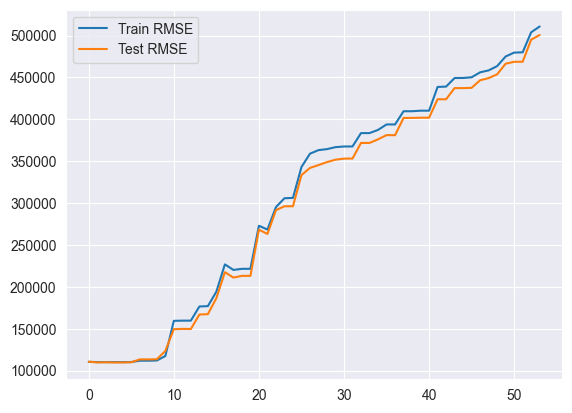

In [130]:
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
#Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
#Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

DROP=[];b=[]

for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), y_train)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(y_train, pred1)))
        Tss.append(np.sqrt(mean_squared_error(y_test, pred2)))
                
print('Dropped Features --> ',DROP)
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

## **5. Feature Selection/Extraction**

## **6. Predictive Modelling**

## **7. Project Outcomes & Conclusion**